In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load in final merged dataset
total_data = "combined_jun13.csv"
df = pd.read_csv(total_data, encoding = "ISO-8859-1" )

In [3]:
print("Shape of full dataset: {}".format(df))

Shape of full dataset:        Unnamed: 0     ID  YEAR_FIPS  YEAR  STATE_FIPS  COUNTY_FIPS  \
0               0      0   20121001  2012           1            1   
1               1      1   20121003  2012           1            3   
2               2      2   20121005  2012           1            5   
3               3      3   20121007  2012           1            7   
4               4      4   20121009  2012           1            9   
5               5      5   20121011  2012           1           11   
6               6      6   20121013  2012           1           13   
7               7      7   20121015  2012           1           15   
8               8      8   20121017  2012           1           17   
9               9      9   20121019  2012           1           19   
10             10     10   20121021  2012           1           21   
11             11     11   20121023  2012           1           23   
12             12     12   20121025  2012           1           25 

In [4]:
#Negative Margin of victory implies larger win for republicans
df['MARGIN_VICTORY']=abs((df['DEM_VOTES']/df['COUNTY_TOTALVOTES'])-(df['REP_VOTES']/df['COUNTY_TOTALVOTES']))
df['TOT_WA%'] = df['WA_MALE%'] + df['WA_FEMALE%']
df['TOT_BA%'] = df['BA_MALE%'] + df['BA_FEMALE%']
df['TOT_H%'] = df['H_MALE%'] + df['H_FEMALE%']

In [5]:
df.head(10)

,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
0,0,0,20121001,2012,1,1,Alabama,Autauga County,1001.0,Mitt Romney,...,0.512912,0.487088,0.293056,0.252858,0.282427,0.171659,0.460304,0.792801,0.177941,0.023889
1,1,1,20121003,2012,1,3,Alabama,Baldwin County,1003.0,Mitt Romney,...,0.510581,0.489419,0.253453,0.230183,0.282293,0.234071,0.557688,0.876354,0.094664,0.044039
2,2,2,20121005,2012,1,5,Alabama,Barbour County,1005.0,Mitt Romney,...,0.469301,0.530699,0.242225,0.270801,0.278741,0.208233,0.031454,0.508452,0.471899,0.049250
3,3,3,20121007,2012,1,7,Alabama,Bibb County,1007.0,Mitt Romney,...,0.463799,0.536201,0.248820,0.283097,0.280955,0.187128,0.466746,0.766221,0.220400,0.017926
4,4,4,20121009,2012,1,9,Alabama,Blount County,1009.0,Mitt Romney,...,0.505255,0.494745,0.271033,0.241682,0.276594,0.210691,0.740940,0.965785,0.014188,0.081275
5,5,5,20121011,2012,1,11,Alabama,Bullock County,1011.0,Mitt Romney,...,0.459276,0.540724,0.248759,0.273212,0.285255,0.192774,0.527997,0.263651,0.710884,0.071429
6,6,6,20121013,2012,1,13,Alabama,Butler County,1013.0,Mitt Romney,...,0.529940,0.470060,0.266068,0.232452,0.272467,0.229013,0.075084,0.545268,0.435727,0.009407
7,7,7,20121015,2012,1,15,Alabama,Calhoun County,1015.0,Mitt Romney,...,0.517780,0.482220,0.259882,0.262102,0.274019,0.203997,0.319238,0.764444,0.206546,0.032935
8,8,8,20121017,2012,1,17,Alabama,Chambers County,1017.0,Mitt Romney,...,0.521833,0.478167,0.247641,0.230057,0.287088,0.235215,0.051673,0.592902,0.389074,0.015796
9,9,9,20121019,2012,1,19,Alabama,Cherokee County,1019.0,Mitt Romney,...,0.503889,0.496111,0.237545,0.210056,0.295026,0.257373,0.549545,0.932740,0.046239,0.012551


In [6]:
# see all columns in merged dataframe
print(df.columns)

Index(['Unnamed: 0', 'ID', 'YEAR_FIPS', 'YEAR', 'STATE_FIPS', 'COUNTY_FIPS',
       'STATE', 'COUNTY', 'FIPS', 'REP_CANDIDATE', 'DEM_CANDIDATE',
       'REP_VOTES', 'DEM_VOTES', 'COUNTY_TOTALVOTES', 'WINNING_CANDIDATE',
       'WINNING_PARTY', 'WINNING_PARTY_BINARY', 'HOUSE_WINNING_BINARY',
       'SENATE_WINNING_BINARY', 'UNEMPLOYMENT_RATE', 'AVG_WAGE_SALARY',
       'AA_FEMALE', 'AA_MALE', 'BA_FEMALE', 'BA_MALE', 'H_FEMALE', 'H_MALE',
       'IA_FEMALE', 'IA_MALE', 'NA_FEMALE', 'NA_MALE', 'TOT_FEMALE',
       'TOT_MALE', 'TOT_POP', 'WA_FEMALE', 'WA_MALE', 'TOT_POP_LESS19',
       'TOT_MALE_LESS19', 'TOT_FEMALE_LESS19', 'TOT_POP_20to39',
       'TOT_MALE_20to39', 'TOT_FEMALE_20to39', 'TOT_POP_40to59',
       'TOT_MALE_40to59', 'TOT_FEMALE_40to59', 'TOT_POP_Above60',
       'TOT_MALE_Above60', 'TOT_FEMALE_Above60', 'AA_FEMALE%', 'AA_MALE%',
       'BA_FEMALE%', 'BA_MALE%', 'H_FEMALE%', 'H_MALE%', 'IA_FEMALE%',
       'IA_MALE%', 'NA_FEMALE%', 'NA_MALE%', 'WA_FEMALE%', 'WA_MALE%',
     

In [7]:
# see how many nulls there are within dataframe
df.isnull().sum()

Unnamed: 0                  0
ID                          0
YEAR_FIPS                   0
YEAR                        0
STATE_FIPS                  0
COUNTY_FIPS                 0
STATE                       0
COUNTY                      0
FIPS                        0
REP_CANDIDATE               0
DEM_CANDIDATE               0
REP_VOTES                   0
DEM_VOTES                   0
COUNTY_TOTALVOTES           0
WINNING_CANDIDATE           0
WINNING_PARTY               0
WINNING_PARTY_BINARY        0
HOUSE_WINNING_BINARY       33
SENATE_WINNING_BINARY    5261
UNEMPLOYMENT_RATE           0
AVG_WAGE_SALARY             0
AA_FEMALE                   0
AA_MALE                     0
BA_FEMALE                   0
BA_MALE                     0
H_FEMALE                    0
H_MALE                      0
IA_FEMALE                   0
IA_MALE                     0
NA_FEMALE                   0
                         ... 
TOT_MALE_20to39             0
TOT_FEMALE_20to39           0
TOT_POP_40

In [8]:
# see how many nulls there are within dataframe
df.describe()

,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,FIPS,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
count,15437.000000,15437.000000,1.543700e+04,15437.000000,15437.000000,15437.000000,15437.000000,1.543700e+04,1.543700e+04,1.543700e+04,...,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000
mean,7718.000000,9842.295265,1.838708e+08,2008.034722,30.641640,103.602902,30745.243117,1.912239e+04,2.017164e+04,4.019208e+04,...,0.501840,0.498160,0.267314,0.242665,0.276653,0.213369,0.291992,0.864514,0.091433,0.076575
std,4456.422388,5780.402235,5.271925e+07,5.660778,14.984992,108.116249,15004.119529,4.417742e+04,7.185842e+04,1.148100e+05,...,0.021356,0.021356,0.034897,0.044546,0.026337,0.053222,0.196820,0.158742,0.146440,0.129256
min,0.000000,0.000000,2.000100e+07,2000.000000,1.000000,1.000000,1001.000000,5.400000e+01,4.000000e+00,6.400000e+01,...,0.278792,0.425760,0.083033,0.118812,0.089292,0.027190,0.000012,0.091430,0.000000,0.000000
25%,3859.000000,4230.000000,2.000485e+08,2004.000000,19.000000,35.000000,19073.000000,2.909000e+03,1.600000e+03,4.856000e+03,...,0.497669,0.487669,0.246773,0.214722,0.262610,0.177398,0.127231,0.819706,0.005046,0.013608
50%,7718.000000,10987.000000,2.008212e+08,2008.000000,29.000000,79.000000,29510.000000,6.339000e+03,3.961000e+03,1.068300e+04,...,0.505558,0.494442,0.266625,0.239430,0.277704,0.208984,0.264285,0.933157,0.021527,0.027831
75%,11577.000000,14921.000000,2.012391e+08,2012.000000,46.000000,133.000000,46017.000000,1.603000e+04,1.080100e+04,2.770900e+04,...,0.512331,0.502331,0.286111,0.265578,0.291647,0.244484,0.432126,0.970204,0.106276,0.071946
max,15436.000000,18854.000000,2.016560e+08,2016.000000,56.000000,840.000000,56045.000000,1.076225e+06,2.464364e+06,3.434308e+06,...,0.574240,0.721208,0.475359,0.548296,0.462687,0.632964,1.209800,1.000000,0.865371,0.975417


In [9]:
#Checking if data contains one hot encoded data
df['WINNING_PARTY_BINARY'].describe()
#df['WINNING_PARTY_BINARY'].head()

count    15437.000000
mean         0.786034
std          0.410117
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: WINNING_PARTY_BINARY, dtype: float64

In [10]:
#Size of Dataset after dropping null values - 2020 data has been dropped in this dataset as we dont have election predictions
df.shape

(15437, 70)

## EXPLORATORY DATA ANALYSIS

In [11]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15437 entries, 0 to 15436
Data columns (total 70 columns):
Unnamed: 0               15437 non-null int64
ID                       15437 non-null int64
YEAR_FIPS                15437 non-null int64
YEAR                     15437 non-null int64
STATE_FIPS               15437 non-null int64
COUNTY_FIPS              15437 non-null int64
STATE                    15437 non-null object
COUNTY                   15437 non-null object
FIPS                     15437 non-null float64
REP_CANDIDATE            15437 non-null object
DEM_CANDIDATE            15437 non-null object
REP_VOTES                15437 non-null float64
DEM_VOTES                15437 non-null float64
COUNTY_TOTALVOTES        15437 non-null float64
WINNING_CANDIDATE        15437 non-null object
WINNING_PARTY            15437 non-null object
WINNING_PARTY_BINARY     15437 non-null int64
HOUSE_WINNING_BINARY     15404 non-null float64
SENATE_WINNING_BINARY    10176 non-null float64

In [12]:
#Determining Missing values
# No missing values
df[df.isnull().any(axis=1)]

,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
0,0,0,20121001,2012,1,1,Alabama,Autauga County,1001.0,Mitt Romney,...,0.512912,0.487088,0.293056,0.252858,0.282427,0.171659,0.460304,0.792801,0.177941,0.023889
1,1,1,20121003,2012,1,3,Alabama,Baldwin County,1003.0,Mitt Romney,...,0.510581,0.489419,0.253453,0.230183,0.282293,0.234071,0.557688,0.876354,0.094664,0.044039
2,2,2,20121005,2012,1,5,Alabama,Barbour County,1005.0,Mitt Romney,...,0.469301,0.530699,0.242225,0.270801,0.278741,0.208233,0.031454,0.508452,0.471899,0.049250
3,3,3,20121007,2012,1,7,Alabama,Bibb County,1007.0,Mitt Romney,...,0.463799,0.536201,0.248820,0.283097,0.280955,0.187128,0.466746,0.766221,0.220400,0.017926
4,4,4,20121009,2012,1,9,Alabama,Blount County,1009.0,Mitt Romney,...,0.505255,0.494745,0.271033,0.241682,0.276594,0.210691,0.740940,0.965785,0.014188,0.081275
5,5,5,20121011,2012,1,11,Alabama,Bullock County,1011.0,Mitt Romney,...,0.459276,0.540724,0.248759,0.273212,0.285255,0.192774,0.527997,0.263651,0.710884,0.071429
6,6,6,20121013,2012,1,13,Alabama,Butler County,1013.0,Mitt Romney,...,0.529940,0.470060,0.266068,0.232452,0.272467,0.229013,0.075084,0.545268,0.435727,0.009407
7,7,7,20121015,2012,1,15,Alabama,Calhoun County,1015.0,Mitt Romney,...,0.517780,0.482220,0.259882,0.262102,0.274019,0.203997,0.319238,0.764444,0.206546,0.032935
8,8,8,20121017,2012,1,17,Alabama,Chambers County,1017.0,Mitt Romney,...,0.521833,0.478167,0.247641,0.230057,0.287088,0.235215,0.051673,0.592902,0.389074,0.015796
9,9,9,20121019,2012,1,19,Alabama,Cherokee County,1019.0,Mitt Romney,...,0.503889,0.496111,0.237545,0.210056,0.295026,0.257373,0.549545,0.932740,0.046239,0.012551


In [13]:
# generate preview of entries with null values
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    print(df[df.isnull().any(axis=1)].tail(3))
    plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
   Unnamed: 0  ID  YEAR_FIPS  YEAR  STATE_FIPS  COUNTY_FIPS    STATE  \
0           0   0   20121001  2012           1            1  Alabama   
1           1   1   20121003  2012           1            3  Alabama   
2           2   2   20121005  2012           1            5  Alabama   

           COUNTY    FIPS REP_CANDIDATE    ...    TOT_FEMALE%  TOT_MALE%  \
0  Autauga County  1001.0   Mitt Romney    ...       0.512912   0.487088   
1  Baldwin County  1003.0   Mitt Romney    ...       0.510581   0.489419   
2  Barbour County  1005.0   Mitt Romney    ...       0.469301   0.530699   

   TOT_POP_LESS19%  TOT_POP_20to39% TOT_POP_40to59% TOT_POP_Above60%  \
0         0.293056         0.252858        0.282427         0.171659   
1         0.253453         0.230183        0.282293         0.234071   
2         0.242225         0.270801        0.278741         0.208233   

   MARGIN_VICTORY   TOT_WA%   TOT_BA%    TOT_H%  
0        0.460304 

As it appears the missing values are primarily in the 2008 and 2012 data.

In [14]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")


No duplicated entries found


In [15]:
#number of counties in the consolidated dataset
df['FIPS'].nunique()

3114

The Dataset does not contain all the counties. 

## MARGIN OF VICTORY

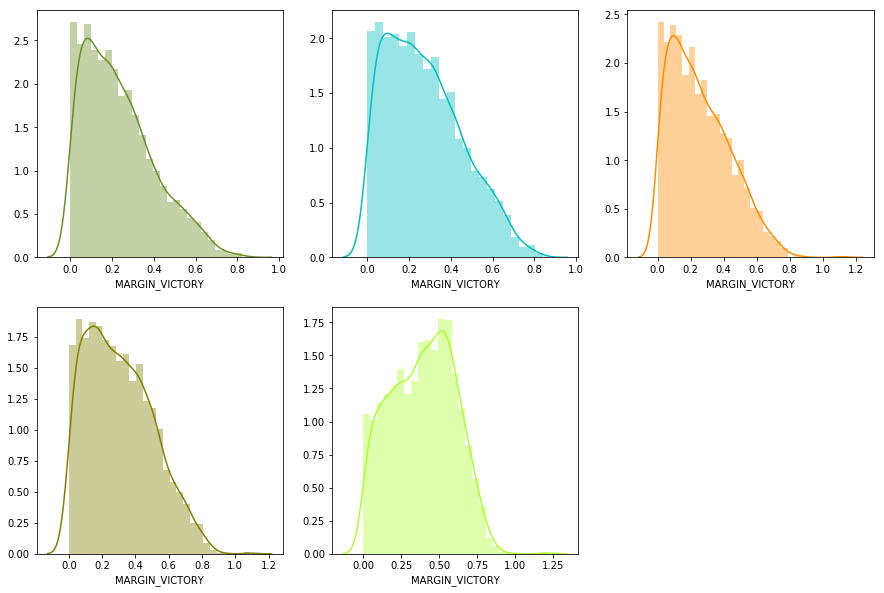

In [16]:
#Margin of victory analysis by Year
def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col);

f = plt.figure(figsize=(15,10))
f.add_subplot(231)
histPlot(df[df.YEAR==2000]['MARGIN_VICTORY'],'olivedrab')
f.add_subplot(232)
histPlot(df[df.YEAR==2004]['MARGIN_VICTORY'],'c')
f.add_subplot(233)
histPlot(df[df.YEAR==2008]['MARGIN_VICTORY'],'darkorange')
f.add_subplot(234)
histPlot(df[df.YEAR==2012]['MARGIN_VICTORY'],'olive')
f.add_subplot(235)
histPlot(df[df.YEAR==2016]['MARGIN_VICTORY'],'greenyellow')

#We observe below that in 2016 more counties were won with a larger margin of victory

## ECONOMIC VARIABLES BY WINNING PARTY

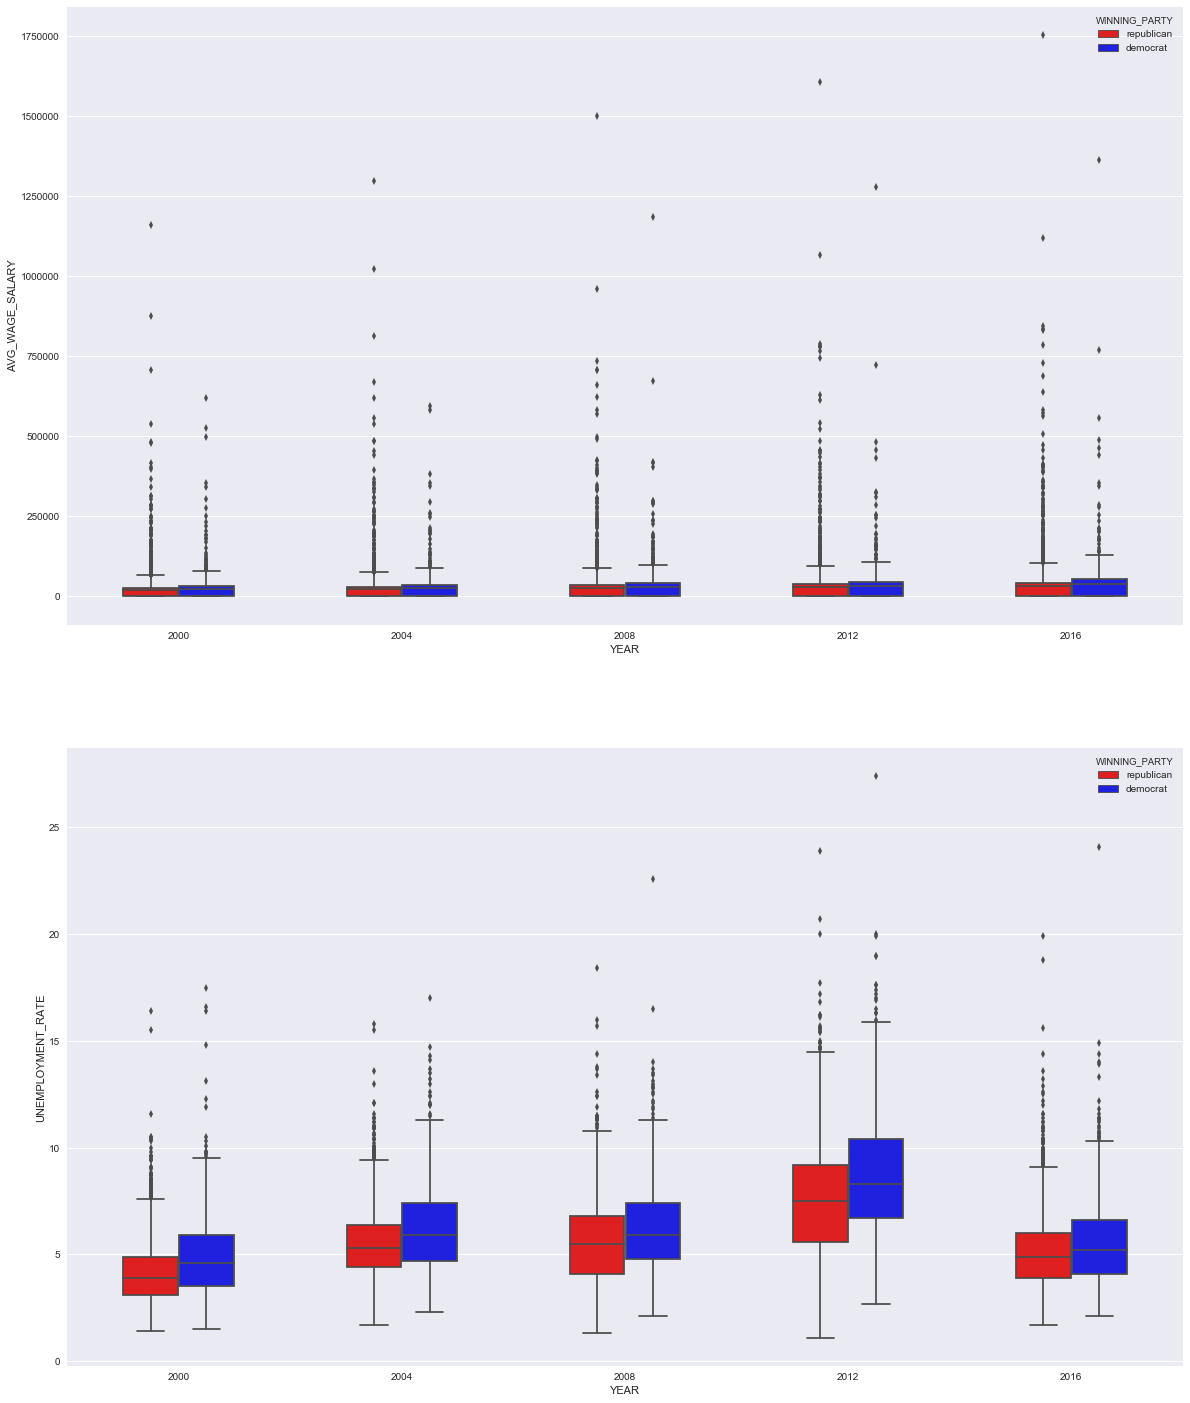

In [40]:
#Analyzing the Economic Variables
colors = ['red','blue']
cmap = sns.color_palette(colors)

def boxPlot(first_feature, sec_feature):
    sns.boxplot(x=first_feature, y=sec_feature, data=df, palette=cmap, width=0.5,hue="WINNING_PARTY");

f = plt.figure(figsize=(20,25))
f.add_subplot(211)
boxPlot('YEAR','AVG_WAGE_SALARY')
f.add_subplot(212)
boxPlot('YEAR','UNEMPLOYMENT_RATE')


## ECONOMIC VARIABLES BY WINNING PARTY AND YEAR

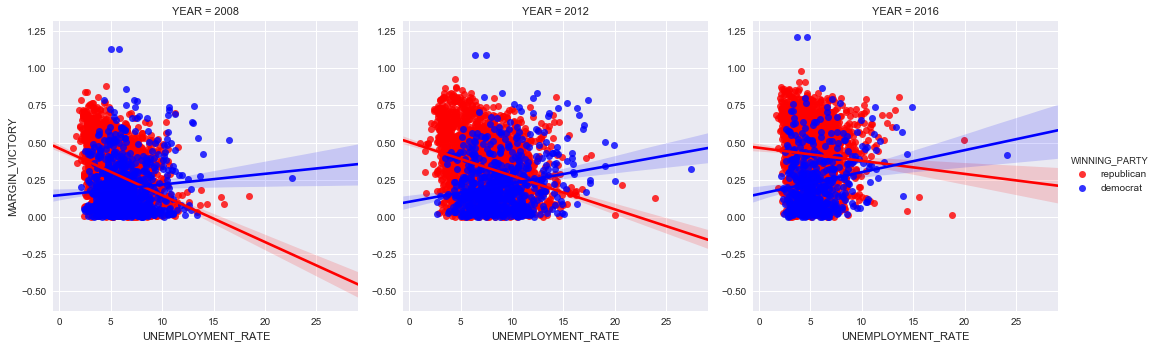

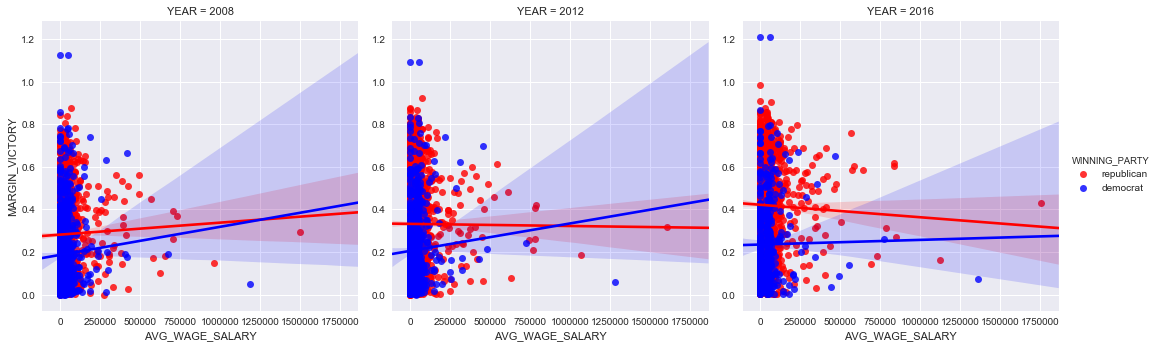

In [23]:
colors = ['red','blue']
cmap = sns.color_palette(colors)
year=[2008,2012,2016]
df_year = df[df.YEAR.isin(year)]

sns.lmplot(x="UNEMPLOYMENT_RATE", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="AVG_WAGE_SALARY", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");

## RACIAL MIX BY WINNING PARTY AND YEAR

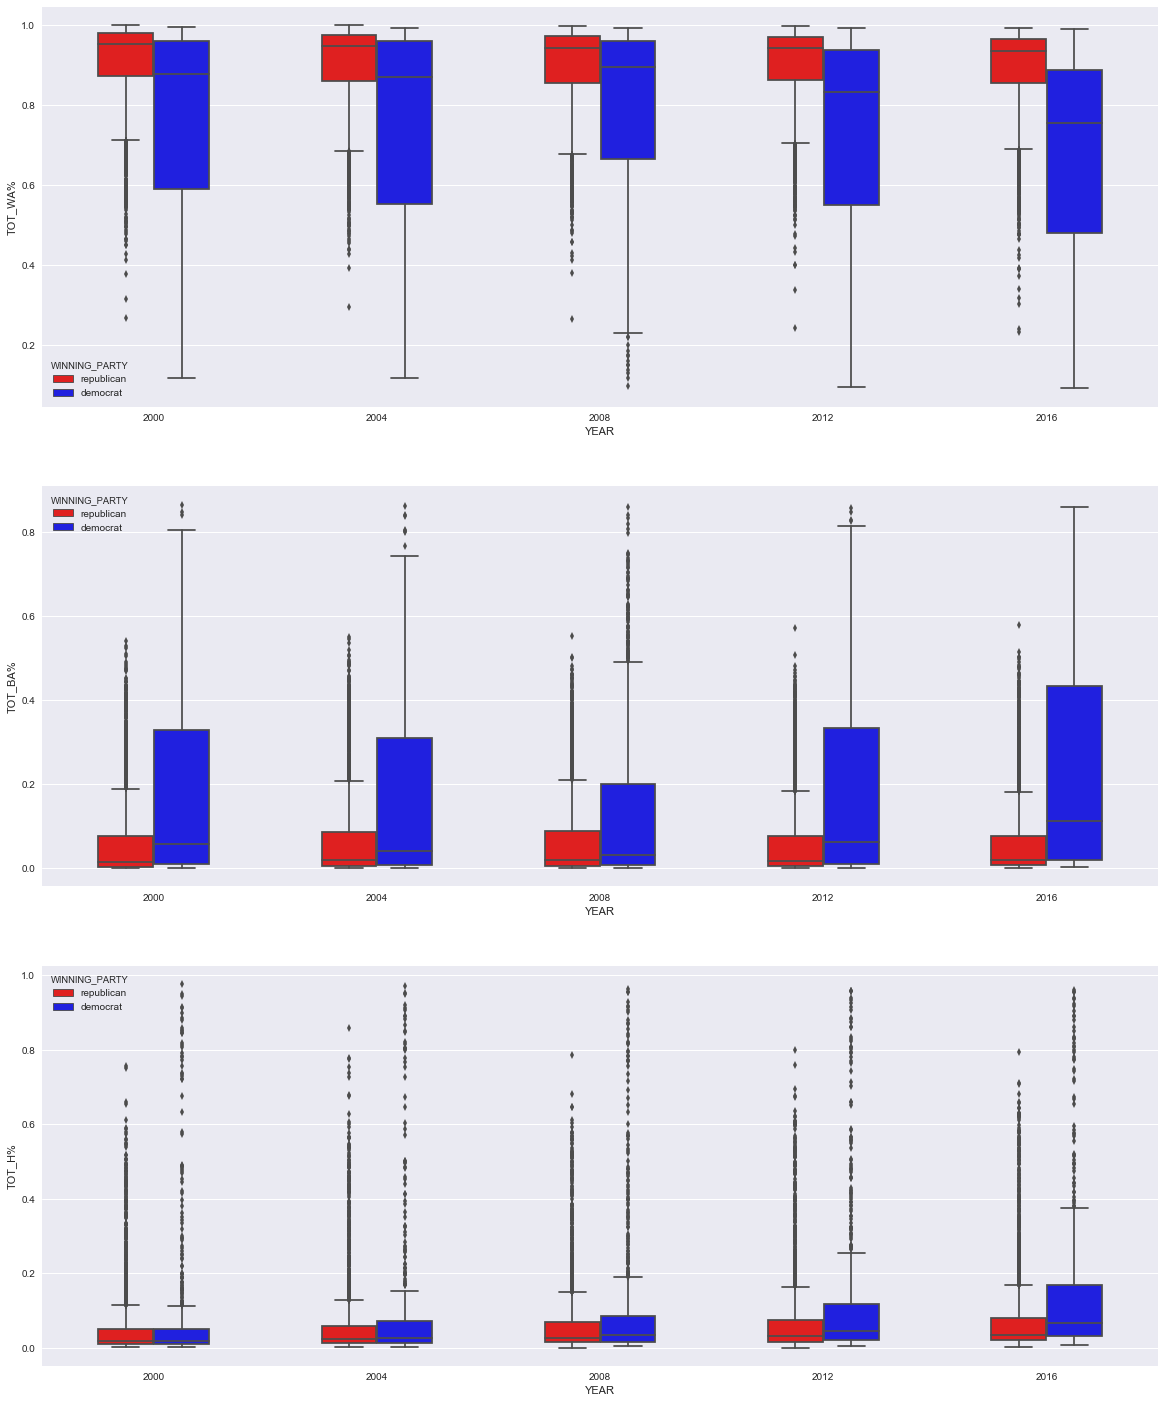

In [101]:
#Analyzing the Economic Variables
colors = ['red','blue']
cmap = sns.color_palette(colors)

def boxPlot(first_feature, sec_feature):
    sns.boxplot(x=first_feature, y=sec_feature, data=df, palette=cmap, width=0.5,hue="WINNING_PARTY");

f = plt.figure(figsize=(20,25))
f.add_subplot(311)
boxPlot('YEAR','TOT_WA%')
f.add_subplot(312)
boxPlot('YEAR','TOT_BA%')
f.add_subplot(313)
boxPlot('YEAR','TOT_H%')

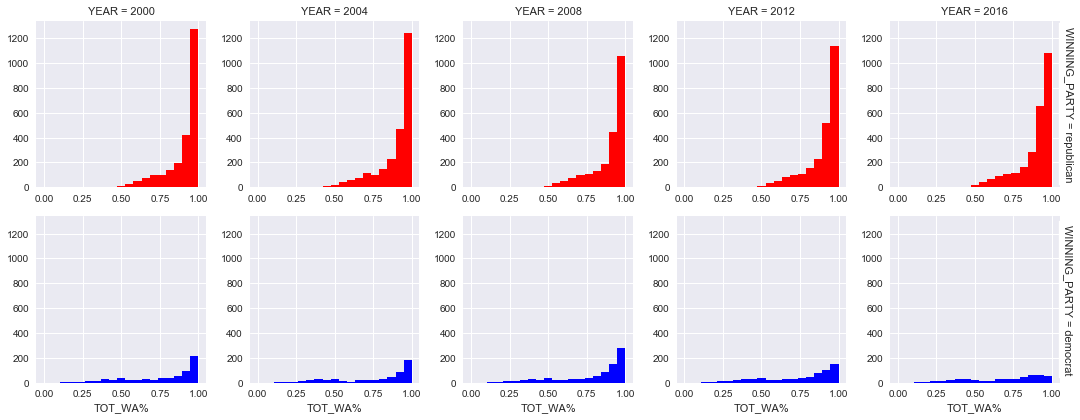

In [19]:
#Analyzing White Population Mix and Winning Party
sns.set(style="darkgrid")
d = {'color': ['r', 'b']}
g = sns.FacetGrid(df, row="WINNING_PARTY", col="YEAR", margin_titles=True,hue_kws=d,hue="WINNING_PARTY")
bins = np.linspace(0, 1, 20)
g.map(plt.hist, "TOT_WA%", bins=bins)

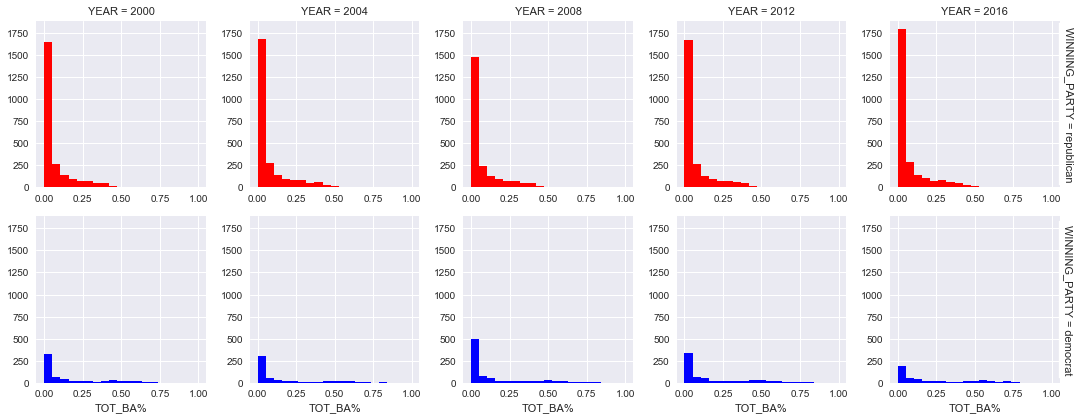

In [20]:
#Analyzing BLack Population Mix and Winning Party
sns.set(style="darkgrid")
d = {'color': ['r', 'b']}
g = sns.FacetGrid(df, row="WINNING_PARTY", col="YEAR", margin_titles=True,hue_kws=d,hue="WINNING_PARTY")
bins = np.linspace(0, 1, 20)
g.map(plt.hist, "TOT_BA%", bins=bins)


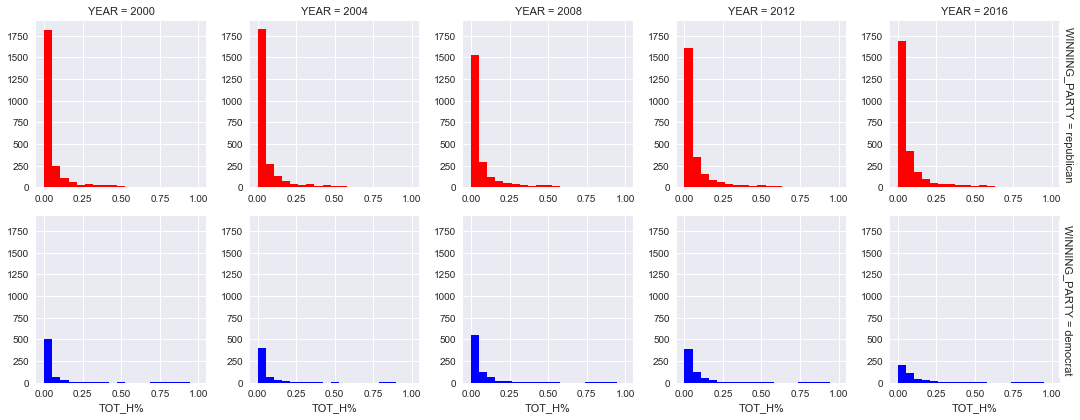

In [21]:
#Analyzing Hispanic Population Mix and Winning Party
sns.set(style="darkgrid")
d = {'color': ['r', 'b']}
g = sns.FacetGrid(df, row="WINNING_PARTY", col="YEAR", margin_titles=True,hue_kws=d,hue="WINNING_PARTY")
bins = np.linspace(0, 1, 20)
g.map(plt.hist, "TOT_H%", bins=bins)

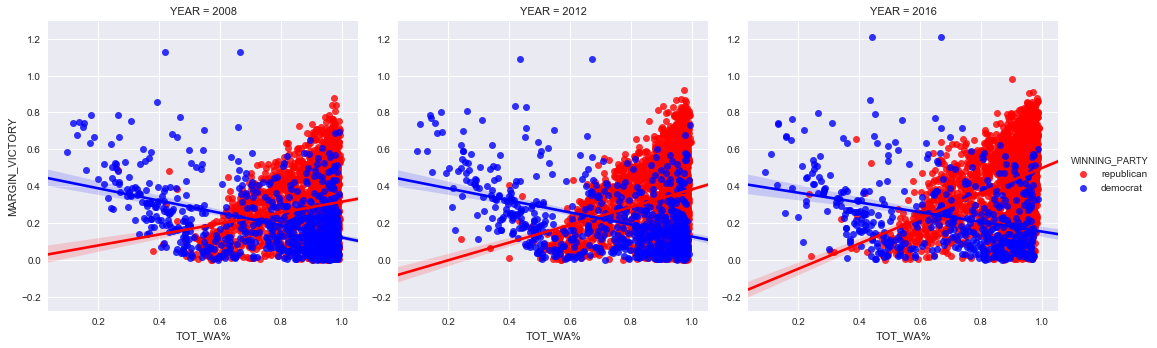

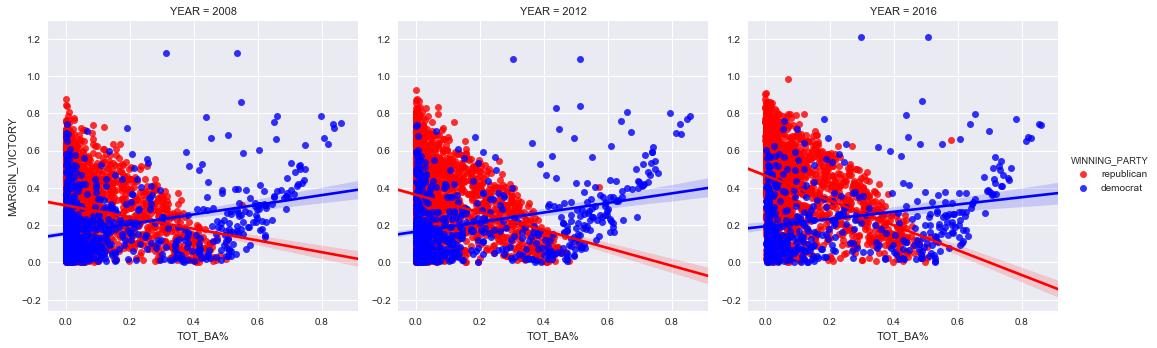

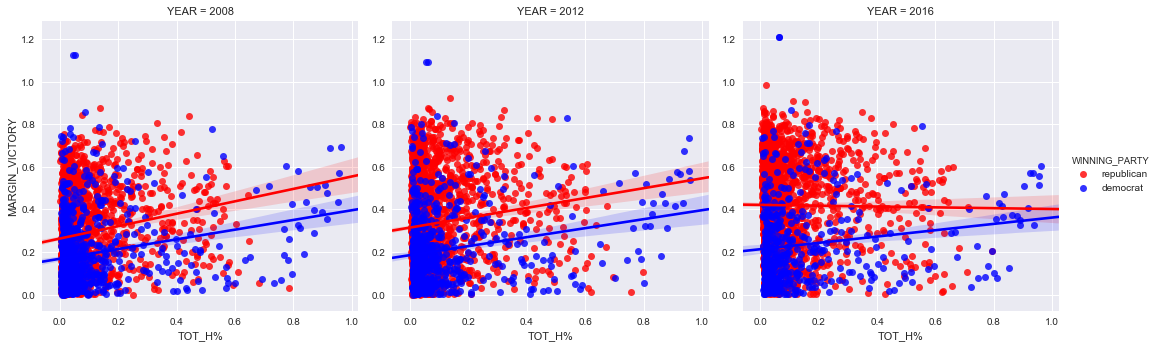

In [22]:
#Analyzing Racial Mix with Year and Winning Party
colors = ['red','blue']
cmap = sns.color_palette(colors)
year=[2008,2012,2016]
df_year = df[df.YEAR.isin(year)]

sns.lmplot(x="TOT_WA%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="TOT_BA%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="TOT_H%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap,  col="YEAR");

## AGE GROUP BY WINNING PARTY AND YEAR

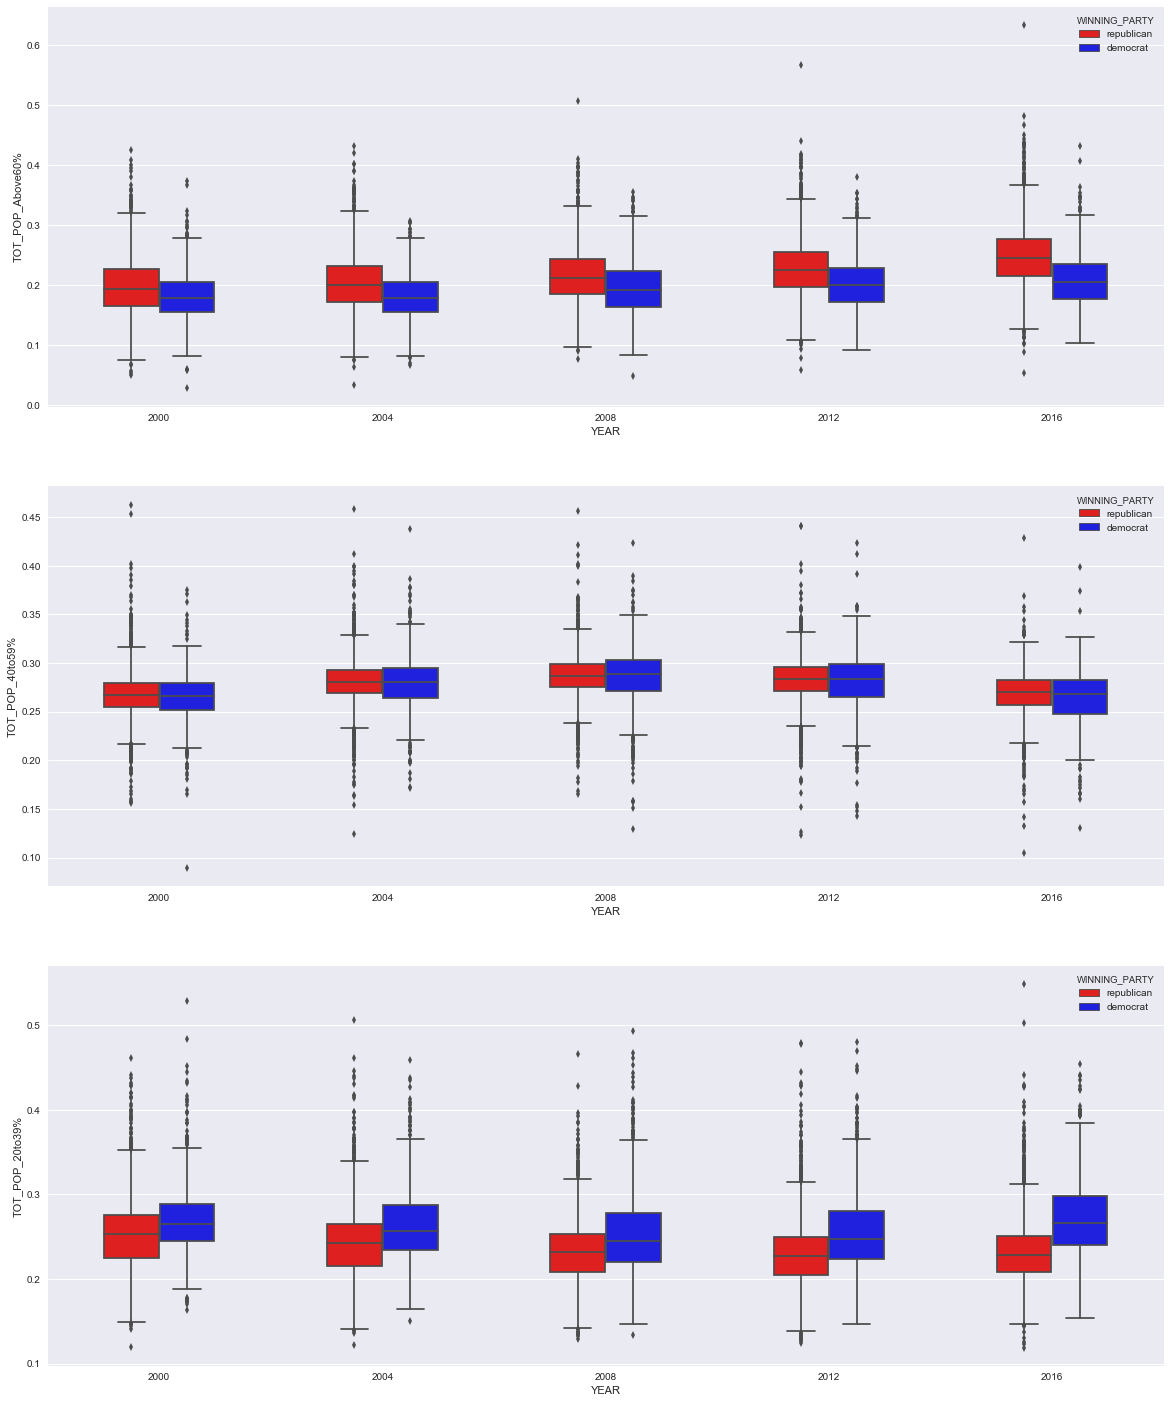

In [37]:
#Analyzing Age group incluence on the results
colors = ['red','blue']
cmap = sns.color_palette(colors)

def boxPlot(first_feature, sec_feature):
    sns.boxplot(x=first_feature, y=sec_feature, data=df, palette=cmap, width=0.5,hue="WINNING_PARTY");

f = plt.figure(figsize=(20,25))
f.add_subplot(311)
boxPlot('YEAR','TOT_POP_Above60%')
f.add_subplot(312)
boxPlot('YEAR','TOT_POP_40to59%')
f.add_subplot(313)
boxPlot('YEAR','TOT_POP_20to39%')

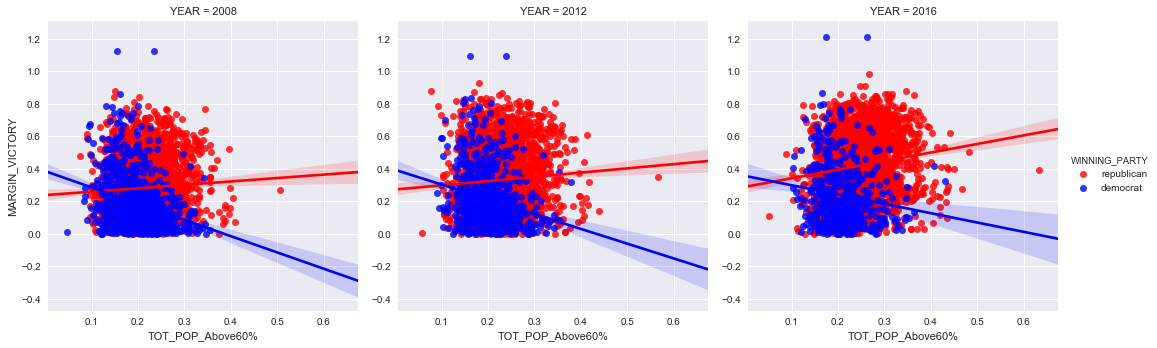

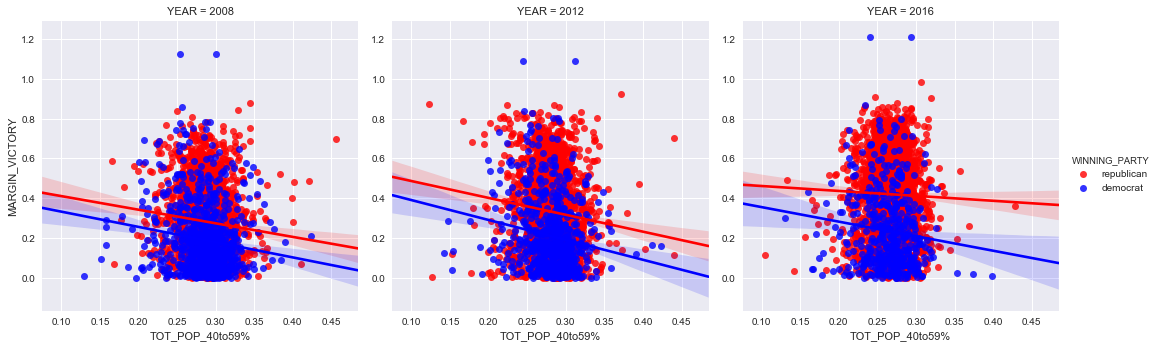

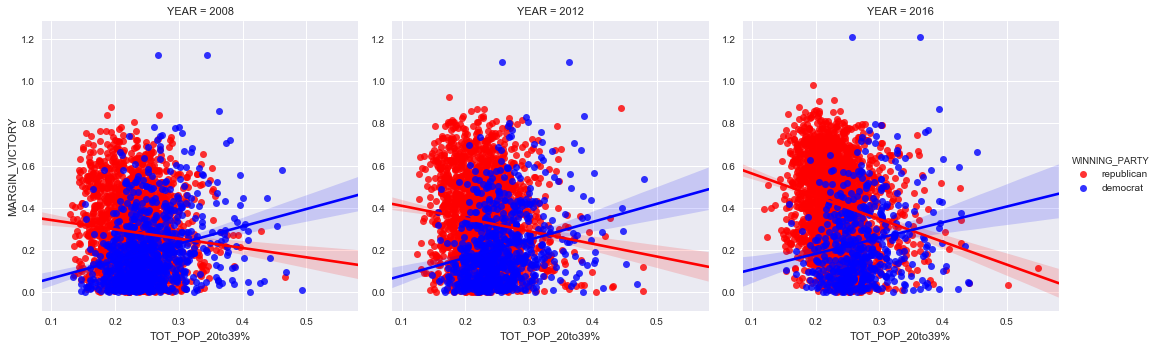

In [102]:
#Analyzing Racial Mix with Year and Winning Party
colors = ['red','blue']
cmap = sns.color_palette(colors)
year=[2008,2012,2016]
df_year = df[df.YEAR.isin(year)]

sns.lmplot(x="TOT_POP_Above60%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="TOT_POP_40to59%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="TOT_POP_20to39%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap,  col="YEAR");

# ANALYZING NUMBER OF SWING STATES

In [73]:
#Margin of Victory Analysis
df['MARGIN_VICTORY'].describe()

count    15437.000000
mean         0.291992
std          0.196820
min          0.000012
25%          0.127231
50%          0.264285
75%          0.432126
max          1.209800
Name: MARGIN_VICTORY, dtype: float64

In [95]:
#Filtering for Margin of Victory less than 1%
df_swing_1 = df[(df.MARGIN_VICTORY < 0.01)]

In [96]:
df_swing_1['MARGIN_VICTORY'].describe()

count    308.000000
mean       0.004955
std        0.002899
min        0.000012
25%        0.002260
50%        0.004963
75%        0.007515
max        0.009928
Name: MARGIN_VICTORY, dtype: float64

In [97]:
#Number of counties with Margin of Victory less than 1%
df_swing_1.groupby('YEAR').count()

,Unnamed: 0,ID,YEAR_FIPS,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
YEAR,,,,,,,,,,,,,,,,,,,,,
2000,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
2004,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
2008,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
2012,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
2016,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


In [98]:
#Filtering for Margin of Victory less than 2%
df_swing_2 = df[(df.MARGIN_VICTORY < 0.02)]

In [99]:
df_swing_2['MARGIN_VICTORY'].describe()

count    613.000000
mean       0.009845
std        0.005707
min        0.000012
25%        0.004959
50%        0.009899
75%        0.014606
max        0.019963
Name: MARGIN_VICTORY, dtype: float64

In [100]:
#Number of counties with Margin of Victory less than 5%
df_swing_2.groupby('YEAR').count()

,Unnamed: 0,ID,YEAR_FIPS,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
YEAR,,,,,,,,,,,,,,,,,,,,,
2000,161,161,161,161,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161
2004,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
2008,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
2012,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
2016,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
